# 1. ZH A csoport - Összesen 10 pont - 90 perc áll rendelkezésre a megoldáshoz

## Azonosító adatok

- NÉV: Molnár Kristóf Ferenc
- NEPTUN KÓD: OHZE4D
- EMAIL CÍM: moleszkf@gmail.com


## Feladatok

### 1. Feladat (1.pont)

Az alábbi ábra egy lehetséges játék eredményének állását reprezentálja egy fa struktúrában az adott játékos szempontjából. 
Sorolja fel azokat a levél elemeket amelyek Alfa-Béta vágás algoritmusát használv nem kerülnek bejárásra.

<img src=" 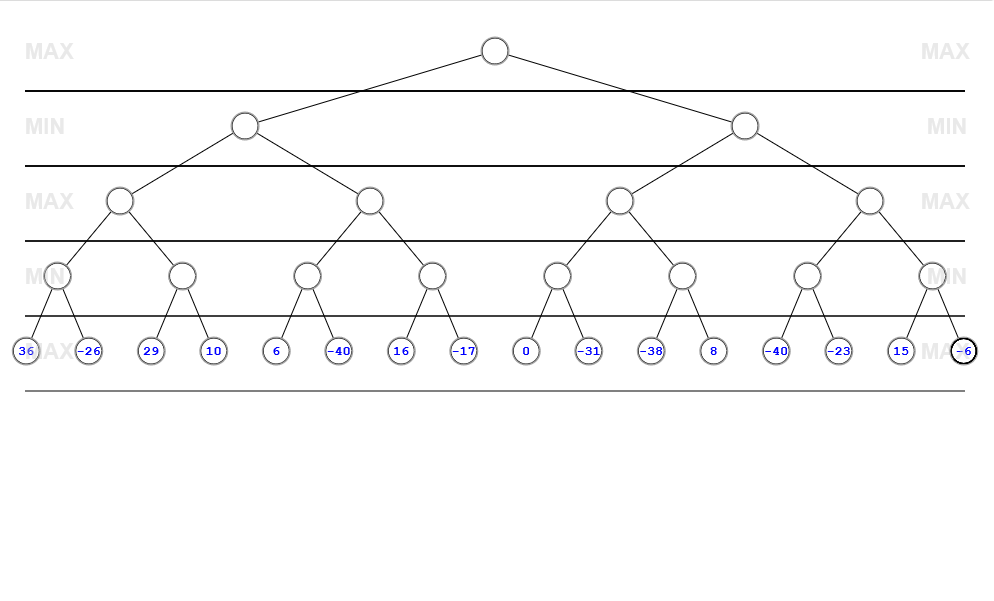" />

### 2. Feladat -  - A megadott adathalmaz használatával építsen fel egy Naiv-Bayes osztályozott. Kövesse a feladat instrukcióit.  (5. pont)

#### 2. Feladat - Adatok letöltése

In [295]:
import pandas as pd
import tensorflow_datasets as tfds
from tqdm import tqdm

dataset = tfds.load('iris', shuffle_files=True)

In [296]:
def convert_to_df(dataset):
    data = []
    for item in tqdm(dataset["train"]):
        features = item['features'].numpy()
        data.append({
            'sepal length': features[0], # Jellemző ami alapján prediktálni akarunk
            'label': item['label'].numpy() # Cimkék amelyet prediktálni szeretnénk
        })
    return pd.DataFrame(data)

df_dataset = convert_to_df(dataset)

  0%|          | 0/150 [00:00<?, ?it/s]2023-05-18 11:23:49.133915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2023-05-18 11:23:49.134403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
100%|██████████| 150/150 [00:00<00:00, 3326.10it/s]


In [297]:
df_dataset["sepal length"] = df_dataset["sepal length"].apply(lambda x: int(round(x)))

In [298]:
df_dataset.head()

,sepal length,label
0,5,0
1,8,2
2,6,1
3,7,2
4,5,0


In [299]:
df_dataset.describe()

,sepal length,label
count,150.000000,150.000000
mean,5.860000,1.000000
std,0.867226,0.819232
min,4.000000,0.000000
25%,5.000000,0.000000
50%,6.000000,1.000000
75%,6.000000,2.000000
max,8.000000,2.000000


In [300]:
def classes(value):
    if(value == 0):
        return "setosa"
    elif(value == 1):
        return "versicolour"
    else:
        return "virginica"

df_dataset["class"] = df_dataset["label"].apply(classes)

df_dataset.head()

,sepal length,label,class
0,5,0,setosa
1,8,2,virginica
2,6,1,versicolour
3,7,2,virginica
4,5,0,setosa


#### 2. Feladat - Tanuló és teszt adatok előkészítése 80 (train) / 20 (test) arányban (1. pont)

In [301]:
"""
Ez volt az alap

num_split = None
df_train = None
df_test = None

"""

num_split = int(len(df_dataset)*0.8)
df_train = df_dataset[:num_split]
df_test = df_dataset[num_split:]

print(df_train.shape)
print(df_test.shape)


(120, 3)
(30, 3)


#### 2. Feladat - Határozza meg a "sepal_length" paraméter gyakoriságát osztályonként. (1. pont)

In [302]:



"""
Ezt biztos meg lehetett volna oldani egszerűbben is de nekem igy sikerült, a lényeg az volt, hogy osztályonként meg kellett tudni h egyes ilyen sepal length milyen eséllyel fordul elő
Ez ugy van hogy megszamoljuk az egyik osztályhoz a a konkrét sepal lengght számot, és elosztod az osztályban tarozo összessel

"""
def freq(cls):
    return {
         sl : [v for k,v in  zip(df_dataset["class"].values, df_dataset["sepal length"].values) if k == cls].count(sl) 
        / len([1 for k in df_dataset["class"].values if k == cls])
        for sl in set(df_dataset["sepal length"].values)
    }


dict_freqs_sepal_length = { 
    "setosa": freq("setosa"),
    "virginica": freq("virginica"), 
    "versicolour": freq("versicolour"),
    }

# To Do

dict_freqs_sepal_length

{'setosa': {4: 0.1, 5: 0.8, 6: 0.1, 7: 0.0, 8: 0.0},
 'virginica': {4: 0.0, 5: 0.02, 6: 0.54, 7: 0.32, 8: 0.12},
 'versicolour': {4: 0.0, 5: 0.12, 6: 0.72, 7: 0.16, 8: 0.0}}

#### 2. Feladat - Határozza meg a "sepal_length" paraméter teljes gyakoriságát. (1. pont)

In [303]:
dict_values = {item : 0.0 for item in list(set(df_dataset['sepal length'].values))}

# To Do100
for k,v in dict_values.items():
    dict_values [k] = len(list(filter(lambda x: x==k, df_dataset["sepal length"].values))) / len(df_dataset["sepal length"].values)

dict_values

{4: 0.03333333333333333,
 5: 0.31333333333333335,
 6: 0.4533333333333333,
 7: 0.16,
 8: 0.04}

#### 2. Feladat - Számolja ki az előfordulási hányadost. Ami az osztályonkénti gyakoriság és teljes gyakoriság hányadosa. (1. pont)

In [304]:
ratio = {item : { "setosa" : 0.0, "virginica" : 0.0, "versicolour" : 0.0}
         for item in list(set(df_dataset['sepal length'].values))}

# To Do

for sl, value in ratio.items():
    for cls, ss in value.items():
        value[cls] = dict_freqs_sepal_length[cls][sl] / dict_values[sl];
ratio

{4: {'setosa': 3.0, 'virginica': 0.0, 'versicolour': 0.0},
 5: {'setosa': 2.5531914893617023,
  'virginica': 0.06382978723404255,
  'versicolour': 0.38297872340425526},
 6: {'setosa': 0.22058823529411767,
  'virginica': 1.1911764705882355,
  'versicolour': 1.5882352941176472},
 7: {'setosa': 0.0, 'virginica': 2.0, 'versicolour': 1.0},
 8: {'setosa': 0.0, 'virginica': 3.0, 'versicolour': 0.0}}

#### 2. Feladat - Készítsen egy predikciós táblát amely tartalmazza, hogy egy adott sepal length értékhez mi a legvalószínűbb osztály. Majd a predikcós táblát használva számolja ki a tanuló és teszt adathalmazon a pontosságot. (1. pont)

In [305]:
import numpy as np

pred_table = {}
# To Do

"""
Kigyüjtjük azt az osztályt ahol a legnagyobb a gyakorság

"""
for sl, v in ratio.items():
    pred_table[sl] = sorted(v.items(), key=lambda x: x[1], reverse=True)[0][0]
    
pred_table

{4: 'setosa', 5: 'setosa', 6: 'versicolour', 7: 'virginica', 8: 'virginica'}

In [306]:
def prediction(val):
    return pred_table[val]

In [307]:
from sklearn.metrics import accuracy_score

pred = []

"""
Elvileg jo lett mert megadta a pontot erre
megnézzük hogy amit eszkábáltunk a train adat mennyire pontos hozzá, magyarán ami a train adatba van ahhoz milyen osztály tartozik, ha az ami az ahhoz a sepal
lengthhez tartozik ami ugymond abba azt ozstályba a leggyakoribb akkor True amugy false
"""
for sl,cls in zip(df_train["sepal length"], df_train["class"]):
    pred.append(True if cls == prediction(sl) else False)

accuracy_score(df_train["label"].values, pred)

0.275

In [308]:
pred = []

for sl,cls in zip(df_test["sepal length"], df_test["class"]):
    pred.append(True if cls == prediction(sl) else False)

accuracy_score(df_test["label"].values, pred)

0.26666666666666666

### 3. Feladat (4. pont)
Használd a Q-learning algoritmust, hogy kiképez egy ágenst ami megtalálja a laborintusban a legrövidebb utat.

#### 3. Feladat. Írd meg a Q-learning osztály action metódusát úgy a Q-learning szabályainak megfelelően. A labirintus megoldásához egy 3 dimenizós Q-táblát használt melynek dimenzióji a következő felépítésüek: (1. pont)
- 1. Sorok száma
- 2. Oszlopok száma
- 3. Cselekvések száma

In [309]:
import random
import numpy as np

class QLearningAgent:
    """
    A Q-learning ügynökünket képviselő osztály
    """
    def __init__(self, n_states_row,  n_states_cols, n_actions, learning_rate):
        self.n_states_row = n_states_row
        self.n_states_cols = n_states_cols
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        
        self.q_table = np.zeros((self.n_states_row, self.n_states_cols, n_actions))
    
    def act(self, state_row, state_col, epsilon):
        # Generáljon véletlen számot a [0, 1] intervallumon
        random_int = random.uniform(0,1)
        action = 0

        """

        Ezt az if, else cuccot kellett megírni csak itten
        """
        # kiválasszuk a legjobbat ha kisebb az epsilon
        if random_int > epsilon:
            action = np.argmax(self.q_table[state_row][state_col])
        else:
            action = random.randint(0, self.n_actions-1)
        return action        
    
    def learn(self, state_row, state_col, action, reward, new_state_row, new_state_col, gamma):
        old_value = self.q_table[state_row][state_col][action]
        new_estimate = reward + gamma * max(self.q_table[new_state_row][new_state_col]) 
        
        self.q_table[state_row][state_col][action] = old_value + self.learning_rate * (new_estimate- old_value)

#### 3. Feladat. Írd meg a play metódust amely elvégzi a labirntus kereső osztály tanulást a Q-Learning ágenst használva (1. pont)

In [310]:
from tqdm import tqdm
import matplotlib.pyplot as plt

class Maze():
    def __init__(self, epsilon, gamma, environment, aisles):
        self.epsilon = epsilon
        self.gamma = gamma
        self.agent: QLearningAgent = None # type: ignore
        self.aisles = aisles
        self.environment_rows = environment[0]
        self.environment_columns = environment[1]
        self.actions = ['up', 'right', 'down', 'left']
        self.rewards = np.full((self.environment_rows, self.environment_columns), -100.)
        self.rewards[0, 5] = 100.

        # Rewardok beállítása a folyosókhoz
        for row in range(1, self.environment_rows-1):
            for col in self.aisles[row]:
                self.rewards[row, col] = -1.
    
    def set_agent(self, agent):
        self.agent = agent

    def get_rewards(self):
        return self.rewards

    def viz(self, tabel):
        plt.imshow(tabel)
        plt.colorbar()
        plt.show()

    def viz_route(self, start_row, start_col):
        shortest_path = self.get_shortest_path(start_row, start_col)
        table = self.get_rewards().copy()
        for item in shortest_path:
            table[item[0]][item[1]] = 50
        
        self.viz(table)
        
    def is_terminal_state(self, row, col):
        """ Vég állapot vizsgálata"""
        if self.rewards[row, col] == -1.:
            return False
        else:
            return True
            epsilon = min_epsi
    def get_starting_location(self):
        """Nem terminális kezdőpont generálása"""
        row = np.random.randint(self.environment_rows)
        column = np.random.randint(self.environment_columns)

        # Ha terminális állapotot generálunk tovább probálkozunk
        while self.is_terminal_state(row, column):
            row = np.random.randint(self.environment_rows)
            column = np.random.randint(self.environment_columns)
        
        return row, column
    
    # define a function that will get the next location based on the chosen action
    def get_next_location(self, row, col, action):
        """Definiál egy függvényt, amely a következő helyet vissza adja a 
        kiválasztott művelet alapján"""
        new_row = row
        new_column = col
        if self.actions[action] == 'up' and row > 0:
            new_row -= 1
        elif self.actions[action] == 'right' and col < self.environment_columns - 1:
            new_column += 1
        elif self.actions[action] == 'down' and row < self.environment_rows - 1:
            new_row += 1
        elif self.actions[action] == 'left' and col > 0:
            new_column -= 1
        return new_row, new_column
  
    def get_shortest_path(self, start_row, start_column):
        """Vissza adja a legröbidebb utat"""       
        if self.is_terminal_state(start_row, start_column):
            return []
        else: 
            # Ha nem terminális a kezdő pont
            current_row, current_column = start_row, start_column
            shortest_path = []
            shortest_path.append([current_row, current_column])
            # Megyünk amíg terminálisig nem jutunk.
            while not self.is_terminal_state(current_row, current_column):
                action = np.argmax(self.agent.q_table[current_row][current_column])                
                current_row, current_column = self.get_next_location(current_row, current_column, action)
                shortest_path.append([current_row, current_column])
                
            return shortest_path

    def play(self, learning_step):
        """A tanulást végző metódus"""
        print(self.rewards)
        for episode in tqdm(range(learning_step)):
            new_row, new_column = self.get_starting_location()
            while not self.is_terminal_state(new_row, new_column):
                


                """
                Illetve ezeket itten alul
                """
                action = self.agent.act(new_row, new_column,self.epsilon);           
                #megnézzük a kövi lépést hogy melyik sor oszlop lesz,     
                next_row, next_col = self.get_next_location(new_row,new_column,action)

                #kiszedjük az ahhoz tartozó cellához a rewardot, 
                reward = self.rewards[next_row][next_col]

                #tanuljon a hibákból
                self.agent.learn(new_row,new_column,action,reward,next_row,next_col,self.gamma);
                new_row, new_column = next_row, next_col
                
                

#### 3. Feladat - Maze osztály példányosítása

In [311]:
# Folyosók
aisles = {}
aisles[1] = [i for i in range(1, 10)]
aisles[2] = [1, 7, 9]
aisles[3] = [i for i in range(1, 10)]
aisles[3].append(9)
aisles[4] = [1, 3, 7, 9]
aisles[5] = [i for i in range(11)]
aisles[6] = [5]
aisles[7] = [i for i in range(1, 10)]
aisles[8] = [3, 7]
aisles[9] = [i for i in range(8)]

In [312]:
maze = Maze(epsilon = 0.9, gamma = 0.9, environment=(11,11), aisles = aisles)

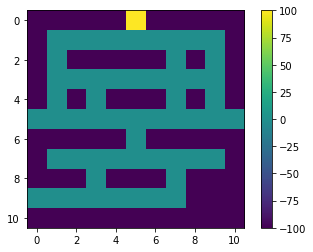

In [313]:
maze.viz(maze.get_rewards())

#### 3. Feladat - Tanítsd be az Ágenst 10000 lépessel (1. pont)

In [314]:


"""
Inicializálod az agénst
"""
n_states_row = maze.environment_rows * maze.environment_rows * 2;
n_states_cols = maze.environment_columns * maze.environment_columns * 2;
maze.agent = QLearningAgent(n_states_row,n_states_cols,4,1.0)

maze.play(10000)

100%|██████████| 10000/10000 [00:00<00:00, 53063.30it/s]

[[-100. -100. -100. -100. -100.  100. -100. -100. -100. -100. -100.]
 [-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
 [-100.   -1. -100. -100. -100. -100. -100.   -1. -100.   -1. -100.]
 [-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
 [-100.   -1. -100.   -1. -100. -100. -100.   -1. -100.   -1. -100.]
 [  -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.]
 [-100. -100. -100. -100. -100.   -1. -100. -100. -100. -100. -100.]
 [-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
 [-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
 [  -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100. -100. -100.]
 [-100. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.]]


#### 3. Feladat - Vizualizáld a megadott kezdőponttal a tanulás eredményét (0.5. pont)

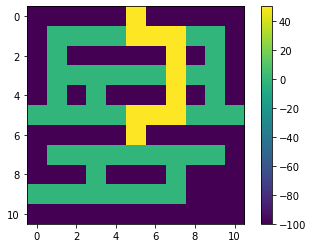

In [315]:
maze.viz_route(6, 5)